In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Run 1 centers (seed = 0):
[[-1.41997382e-01 -1.62632348e-02 -7.68450541e-02 -1.40432757e-01
   2.49693351e-02 -2.52259225e-01 -9.54240769e-03  6.50461941e-03
   9.05093712e-03 -1.28647376e-02 -7.65520465e-04  3.10932787e-04
  -2.27060385e-04  8.17760208e-05]
 [ 1.35120427e+02 -8.77803581e+00  7.72707963e+00  5.36542440e+01
  -2.45475354e+01 -1.29468700e+01  7.50859579e-01  9.33077784e-02
   1.06356894e+00  6.86774316e-02 -1.12361087e-01 -1.41884704e-02
  -8.87524938e-04  4.23331129e-03]
 [ 3.90880208e-01  1.12234351e-01  3.97557064e-01  6.98367487e-01
   5.72050858e-01 -9.59300603e-02 -1.54683301e-02 -3.50412432e-02
  -3.20874405e-02  1.35389431e-02  3.21439546e-03  6.56080497e-04
   4.59649226e-04  3.09408715e-04]
 [ 4.33926185e-01 -1.92953128e-01  3.29243131e-01  2.44899937e-01
  -4.41824644e-01  1.01895011e+00 -3.21247070e-01 -2.26073267e-02
  -6.71051017e-02  1.46074298e-02  4.03598758e-03  1.50783791e-03
   9.60510339e-05 -2.10256337e-04]
 [-4.73296013e-01 -8.64434530e-02 -4.5127

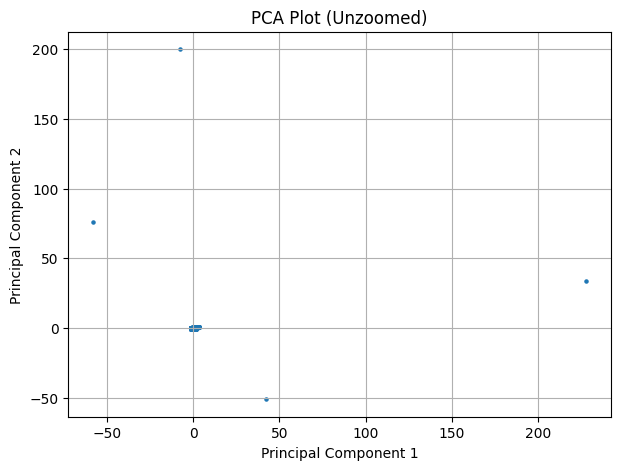

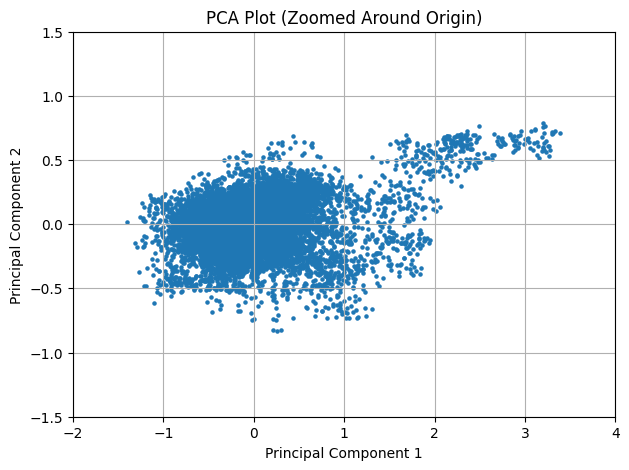

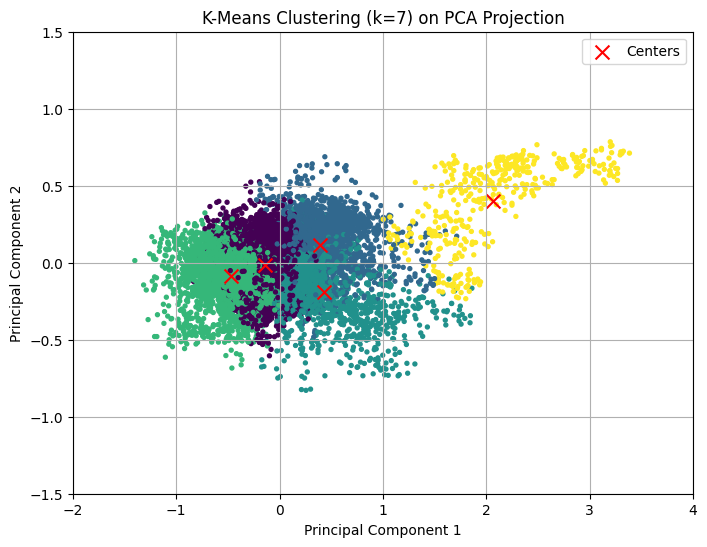

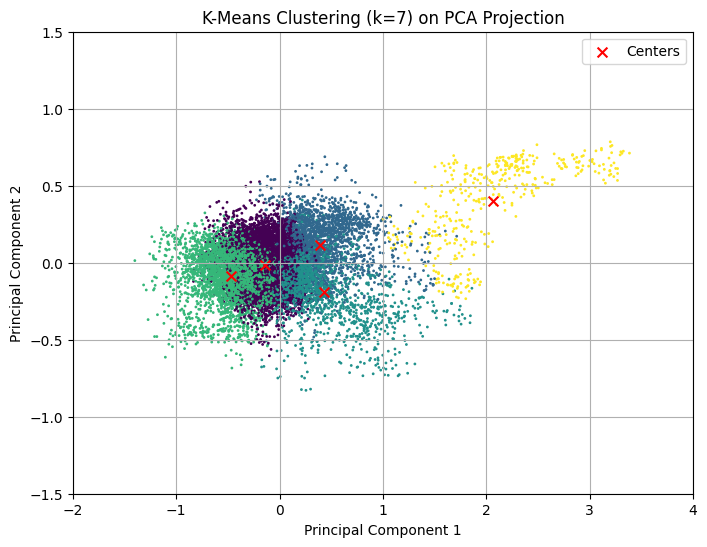

In [ ]:
# 1. Load data
df = pd.read_csv("eeg-eye-state.csv")
df = df.drop(columns=["eyeDetection"])

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# 2. PCA (keep 14 comps)
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X_std)

# 3. PCA Plot (default scale)
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot (Unzoomed)")
plt.grid(True)
plt.savefig('pca_plot_unzoomed.png', dpi=150)

# 4. PCA Plot (zoom near origin)
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.xlim(-2, 4)
plt.ylim(-1.5, 1.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot (Zoomed Around Origin)")
plt.grid(True)
plt.savefig('pca_plot_zoomed.png', dpi=150)

# 5. K-Means (k=7, random init)
k = 7
kmeans = KMeans(n_clusters=k, init="random", n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_std)

# Project cluster centers into PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)

# 6. Cluster Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=8)

# plot centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c="red", marker="x", s=100, label="Centers")
# Zoom in
plt.xlim(-2, 4)
plt.ylim(-1.5, 1.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (k=7) on PCA Projection")
plt.legend()
plt.grid(True)
plt.savefig('pca_cluster_plot.png', dpi=150)

# 6. Cluster Plot (smaller points)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=1)

# plot centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c="red", marker="x", s=50, label="Centers")
# Zoom in
plt.xlim(-2, 4)
plt.ylim(-1.5, 1.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (k=7) on PCA Projection")
plt.legend()
plt.grid(True)
plt.savefig('pca_cluster_plot2.png', dpi=150)


# 7. Repeat k-means several times
all_centers = []

for seed in [0, 10, 20, 50, 99]:
    km = KMeans(n_clusters=k, init="random", n_init=10, random_state=seed)
    km.fit(X_std)
    all_centers.append(km.cluster_centers_)

# Show how different the centers are
for i, c in enumerate(all_centers):
    print(f"\nRun {i+1} centers (seed = { [0,10,20,50,99][i] }):")
    print(pca.transform(c))  
